In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df=pd.read_csv('D:/Project Netflix/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#no. of unique values in our data
for i in df.columns:
    print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [4]:
#checking null values in every in column of our data
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
#checking the occurences of each of the ratings
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

## Unnesting Columns

In [6]:
#Directors
constraint1=df['director'].apply(lambda x:str(x).split(', ' )).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [7]:
#Cast
constraint2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [8]:
#Genre
constraint3=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Genre'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [9]:
#Country
constraint4=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4,index=df['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.drop(['level_1'],axis=1,inplace=True)
df_new4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [10]:
#merging the unnested director data with unnested actors data
df_new5=df_new2.merge(df_new1,on=['title'],how='inner')
#merging the above merge data with unnested genre data
df_new6=df_new5.merge(df_new3,on=['title'],how='inner')
#merging the above merged data with unnested country data
df_new=df_new6.merge(df_new4,on=['title'],how='inner')
df_new

,title,Actors,Directors,Genre,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
201987,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [11]:
#replacing nan values of director and actor by Unknown Actor and Director
df_new['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
df_new['Directors'].replace(['nan'],['Unknown Director'],inplace=True)
df_new['country'].replace(['nan'],[np.nan],inplace=True)
df_new.head()

,title,Actors,Directors,Genre,country
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa


In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
#merging our unnested data with the original data
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


## Replacing Null Values

In [14]:
#Checking null values
df_final.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [15]:
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating']='NR'
df_final.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [16]:
#Ratings can't be min, so  it has been made NR(Non-Rated)
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)

In [17]:
#Checking date added null values
df_final[df_final['date_added'].isnull()].head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136894,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136895,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136896,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136897,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons


In [19]:
#date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added 
#when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
# and imputes in place of nulls the corresponding mode

for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
    imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
    df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

In [20]:
#country column is imputed on the basis of director,i.e- suppose there's a null for country 
#when we have a director whose other movies have a country given.So below piece of code just checks the mode of 
#country for the director
# and imputes in place of nulls the corresponding mode

for i in df_final[df_final['country'].isnull()]['Directors'].unique():
    if i in df_final[~df_final['country'].isnull()]['Directors'].unique():
        imp=df_final[df_final['Directors']==i]['country'].mode().values[0]
        df_final.loc[df_final['Directors']==i,'country']=df_final.loc[df_final['Directors']==i,'country'].fillna(imp)

In [23]:
# So we imputed the country column on the basis of directors
# whose other movie titles had countries given. 
# But there might be directors who have only one occurence 
# in our data. In that scenario, I have used Actors as a basis.
# i.e- for this Actor majorly acts in movies of which country? 
# Imputation has been done on this basis. For remaining rows,
# country has been filled as Unknown Country

In [21]:
for i in df_final[df_final['country'].isnull()]['Actors'].unique():
    if i in df_final[~df_final['country'].isnull()]['Actors'].unique():
        imp=df_final[df_final['Actors']==i]['country'].mode().values[0]
        df_final.loc[df_final['Actors']==i,'country']=df_final.loc[df_final['Actors']==i,'country'].fillna(imp)

In [22]:
df_final['country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()

title           0
Actors          0
Directors       0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [24]:
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [25]:
df_final['duration'].value_counts()

duration
1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: count, Length: 220, dtype: int64

In [26]:
#removing min from data
df_final['duration']=df_final['duration'].str.replace(" min","")
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [27]:
df_final['duration'].unique()

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [29]:
df_final['duration_copy']=df_final['duration'].copy()
df_final1=df_final.copy()

In [30]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [31]:
df_final1['duration_copy'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

In [39]:
#Titles such as Bahubali(Hindi Version),
# Bahubali(Tamil Version) were there.
# Since it's only one movie in different languages,
# presence of brackets and content between brackets is removed.

df_final['title']=df_final1['title'].str.replace(r"\(.*\)","")
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [40]:
#no. of distinct titles on the basis of genre
df_final1.groupby(['Genre']).agg({"title":"nunique"})

,title
Genre,
Action & Adventure,859
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,641
Classic & Cult TV,28
Classic Movies,116
Comedies,1674
Crime TV Shows,470


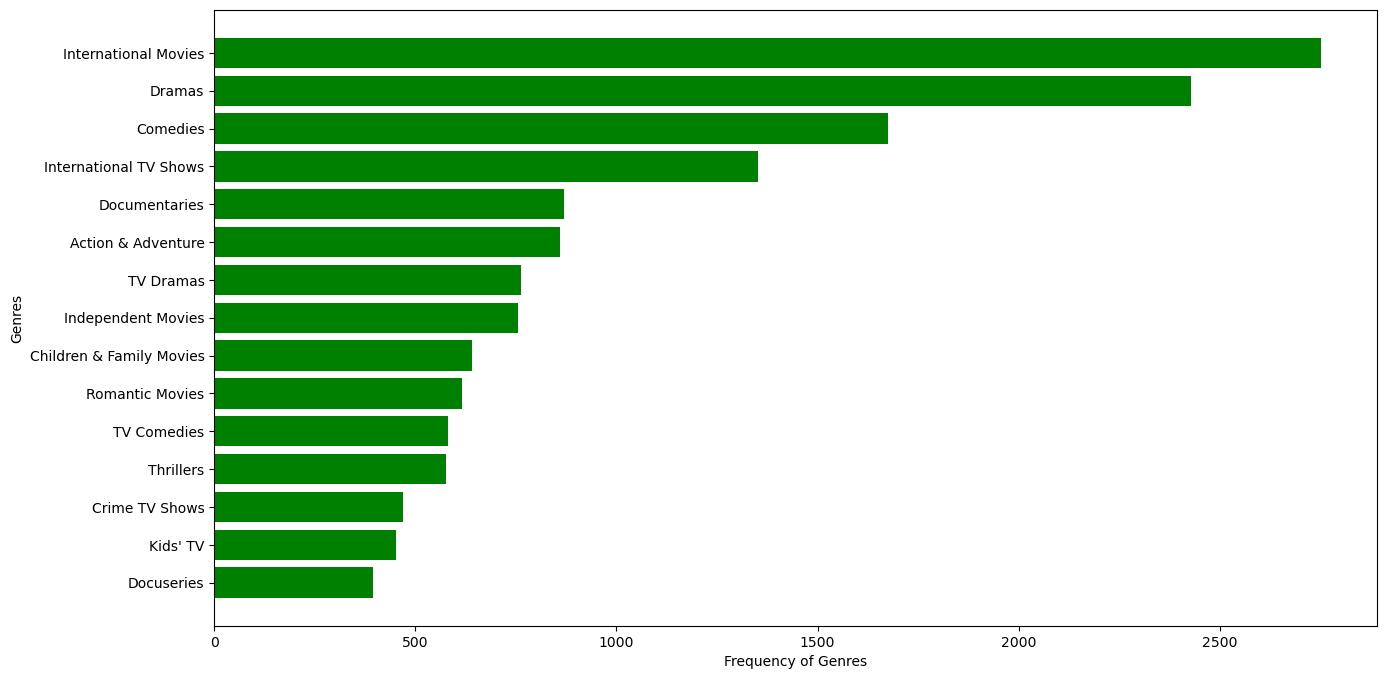

In [38]:
df_genre=df_final1.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'],df_genre[::-1]['title'],color=['green'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

In [41]:
#number of distinct titles on the basis of type
df_final1.groupby(['type']).agg({"title":'nunique'})

,title
type,
Movie,6131
TV Show,2676


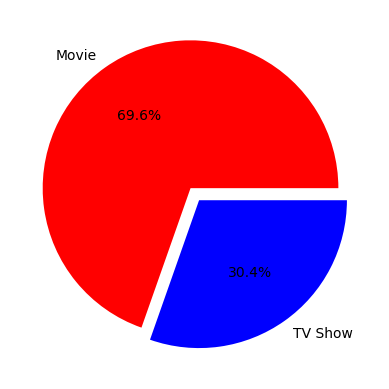

In [42]:
df_type=df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(df_type['title'],explode=(0.05,0.05),labels=df_type['type'],colors=['red','blue'],autopct='%.1f%%')
plt.show()

In [43]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
...,...
Vatican City,1
Venezuela,4
Vietnam,7


In [44]:
df_final1['country']=df_final1['country'].str.replace(',','')
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [45]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
...,...
Vatican City,1
Venezuela,4
Vietnam,7


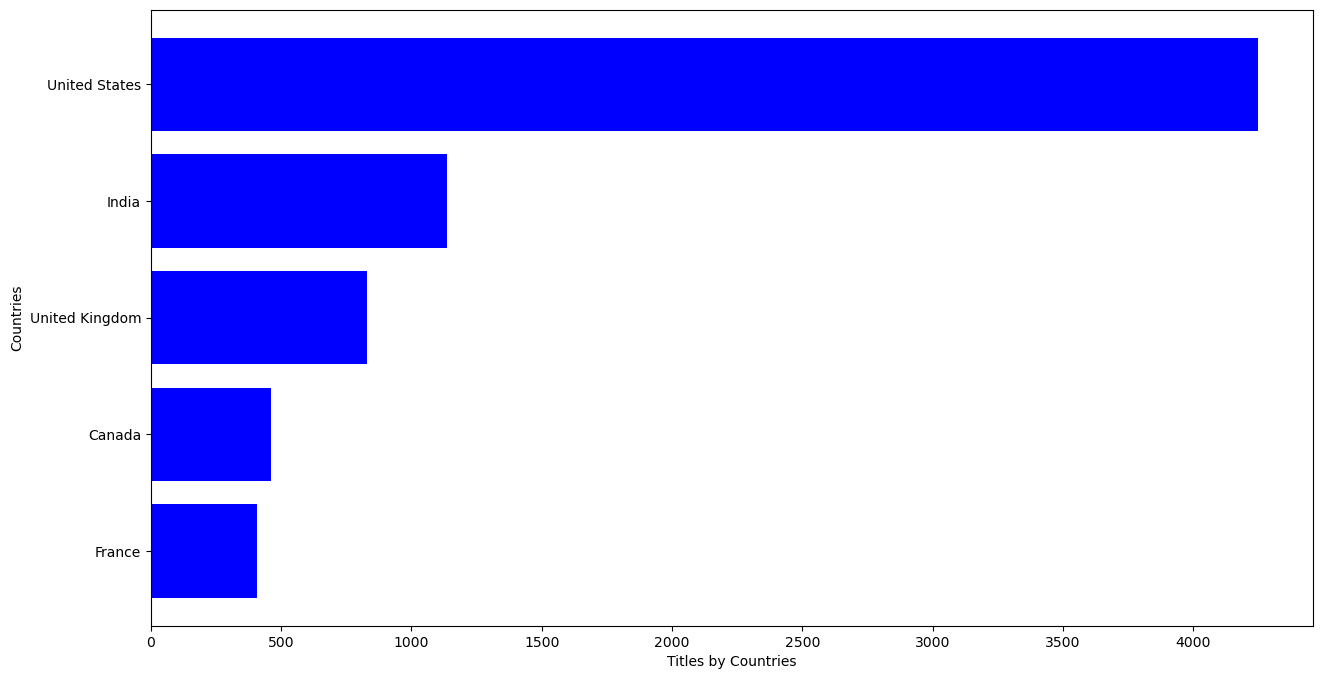

In [46]:
df_country=df_final1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'],df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

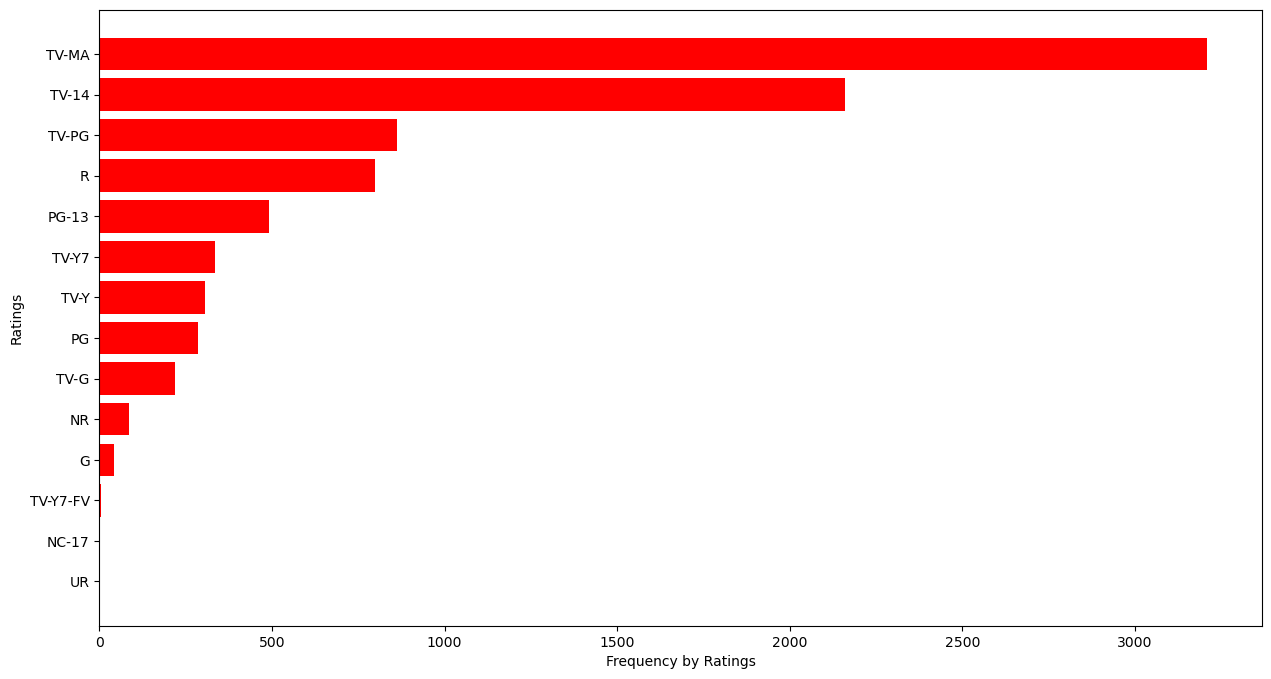

In [47]:
df_rating=df_final1.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]['title'],color=['red'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

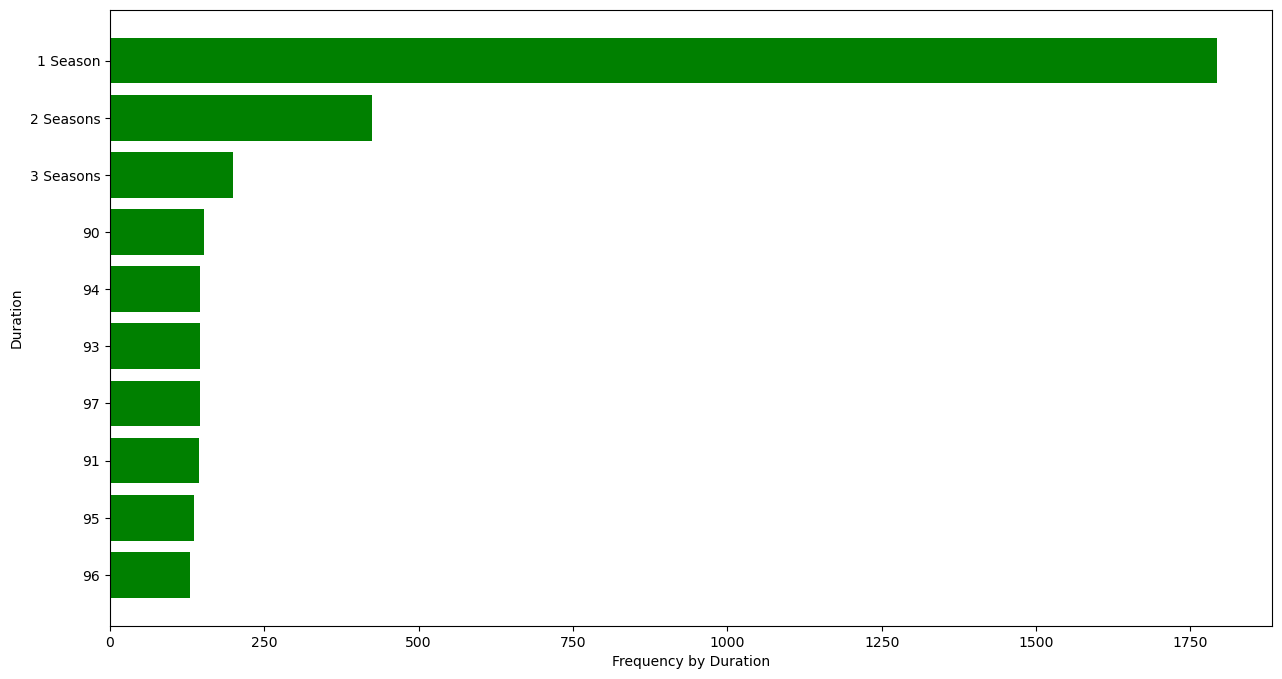

In [48]:
df_duration=df_final1.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['green'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

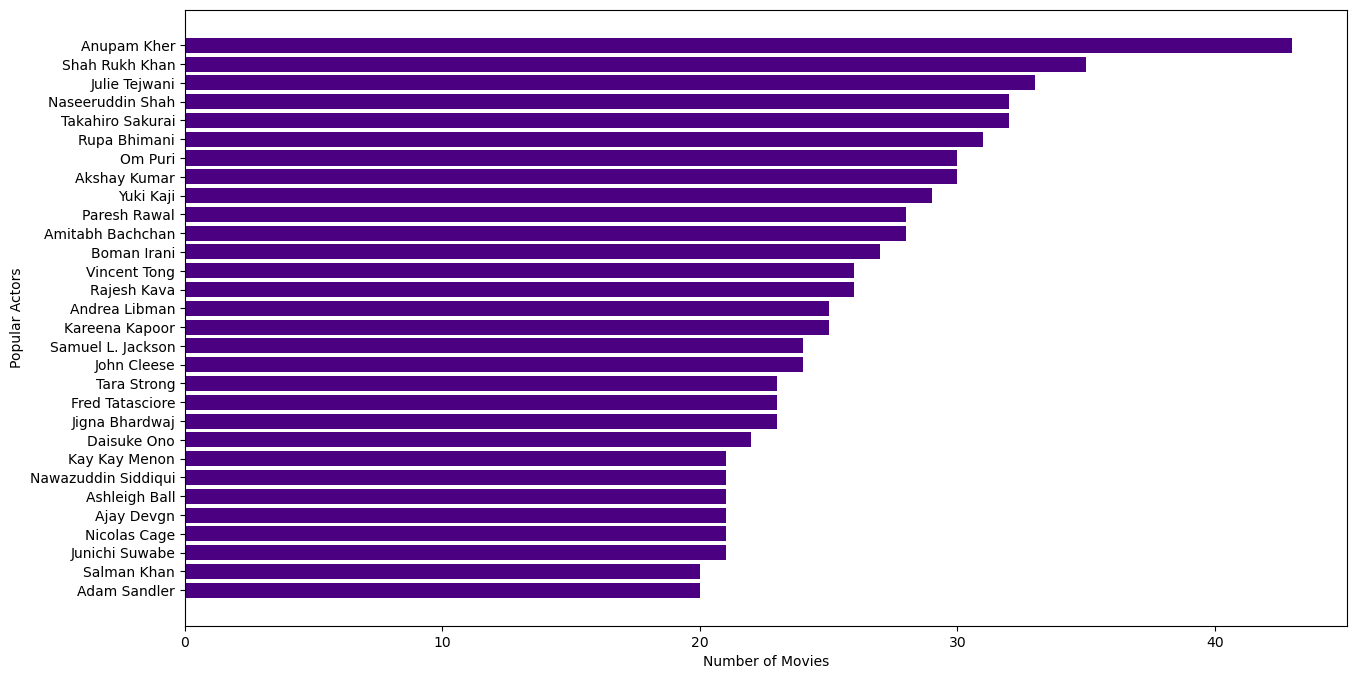

In [49]:
df_actors=df_final1.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

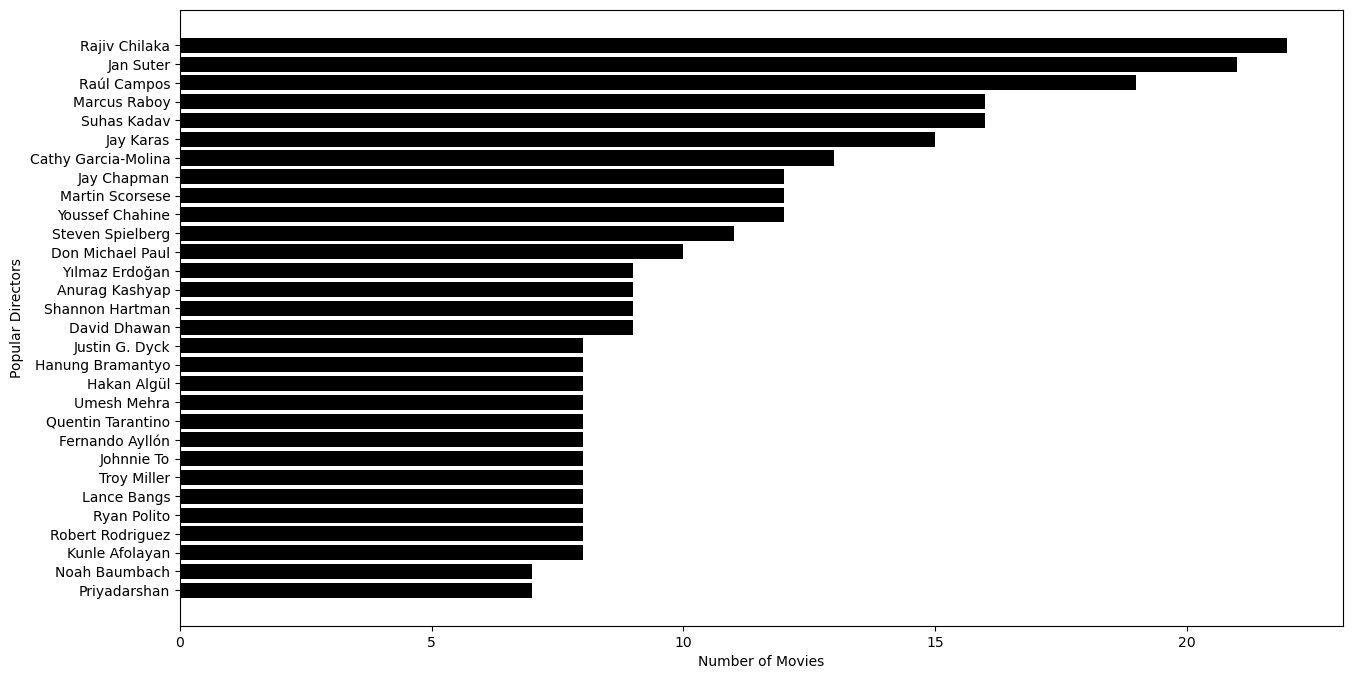

In [62]:
df_directors=df_final1.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['black'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

In [54]:
df_shows=df_final1[df_final1['type']=='TV Show']
df_movies=df_final1[df_final1['type']=='Movie']

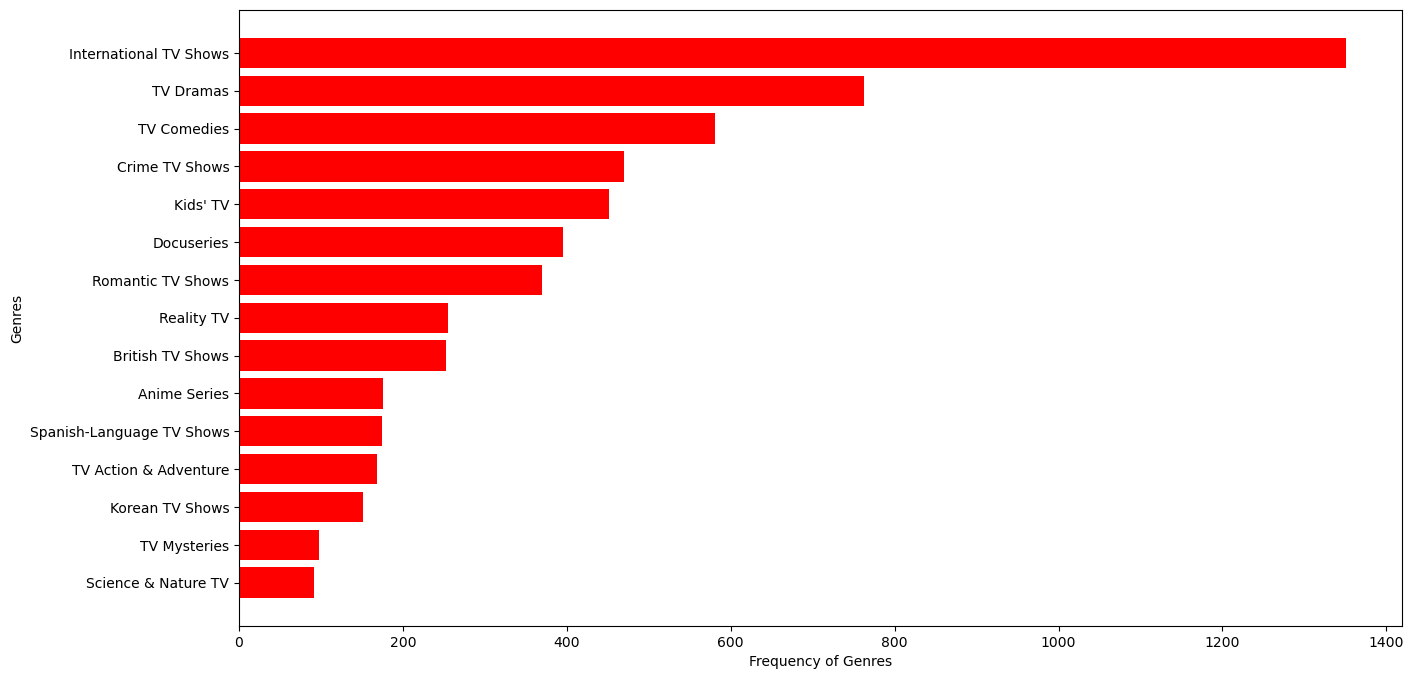

In [61]:
df_genre=df_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['red'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

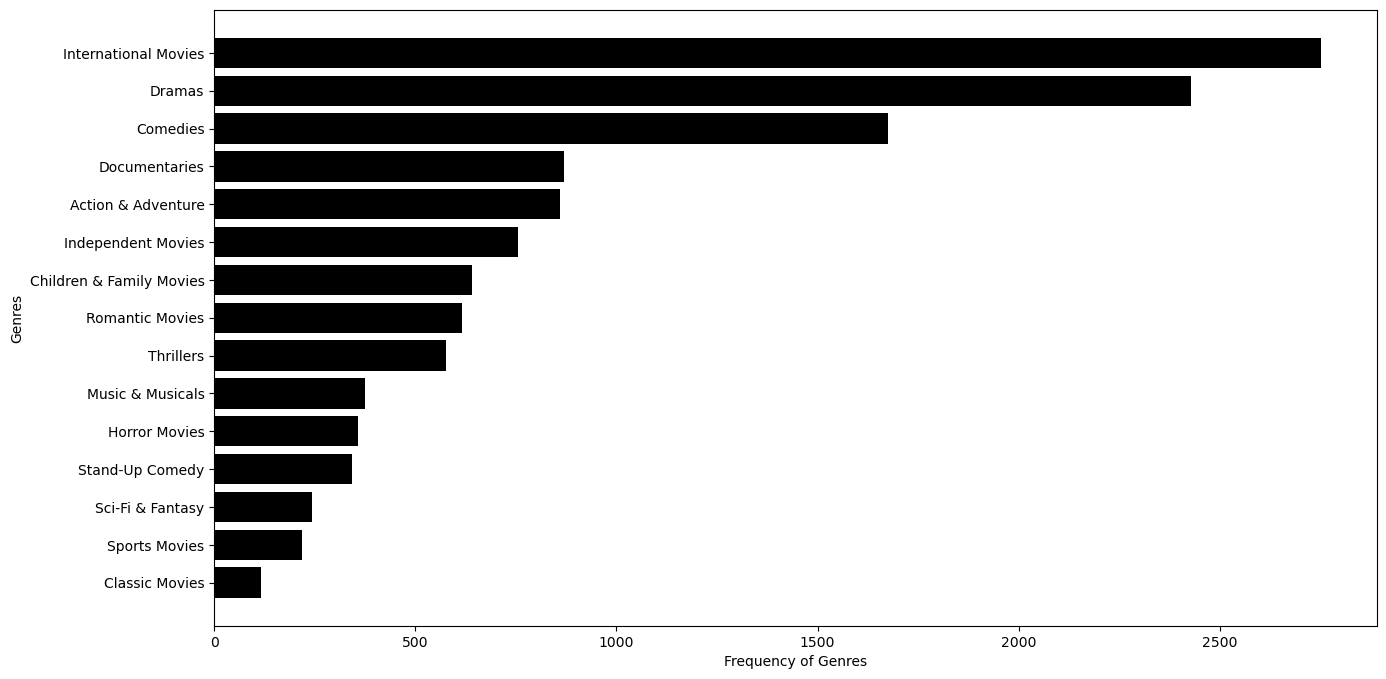

In [60]:
df_genre=df_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['black'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

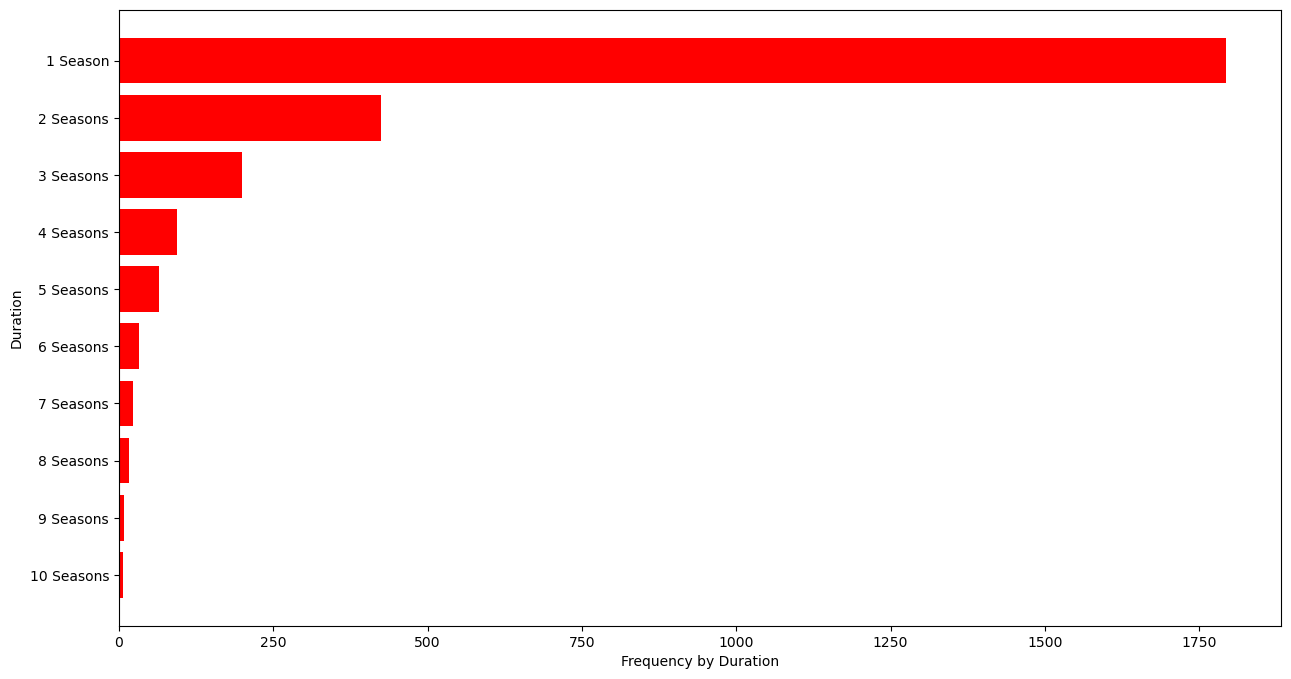

In [59]:
df_duration=df_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['red'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()